In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
import glob as glob
from scipy.interpolate import interp1d

In [2]:
relic = pd.read_csv('Relic_WIMP_Abundance.tsv',sep='\s+')

relic['mass'] =  relic['mass'] / 1000

In [3]:
relic.head() # mass in GeV, <sv> in cm3s-1 

,mass,sigmav
0,0.000100,4.747020e-26
1,0.000133,4.837890e-26
2,0.000176,4.915790e-26
3,0.000234,4.993680e-26
4,0.000323,5.058600e-26


In [4]:
dSphNames = ['DraI','RetII', 'Scl', 'SgrII', 'UMaII', 'UMi','CBe','Wil1']
dSphLabels = [r'DraI (T$_{obs}$=100h)', r'Wil1 (T$_{obs}$=100h)', r'CBe (T$_{obs}$=100h)', r'Scl (T$_{obs}$=100h)',r'RetII (T$_{obs}$=100h)', r'SgrII (T$_{obs}$=100h)']
dSphcolor = ['tab:gray','tab:gray','tab:gray','tab:orange','tab:orange','tab:orange','tab:brown','tab:brown']
channels = ['b','Tau']
profiles=['Einasto','Burkert']

In [5]:
df_list = []
for name in dSphNames:
    for profile in profiles:
    
        filename = 'sv_limits_quantiles/'+name+'_'+profile+'_Annichilation.csv'
        df_list.append(pd.read_csv(filename))
        
df = pd.concat(df_list, ignore_index=True)
df.drop_duplicates(inplace=True)

# Rescale mass column by 1/1000 to have it in TeV
df['mass'] = df['mass'] / 1000

In [6]:
df_stack_Wil1_and_CBe_T300 = pd.read_csv('sv_limits_quantiles/Combined_Annichilation_CBe_Wil1_T600.csv')
df_stack = pd.read_csv('sv_limits_quantiles/Combined_Annichilation_AllSources_T600.csv')

df_stack_Wil1_and_CBe_T300['mass'] = df_stack_Wil1_and_CBe_T300['mass'] / 1000
df_stack['mass'] = df_stack['mass'] / 1000


## Best two single and Combined

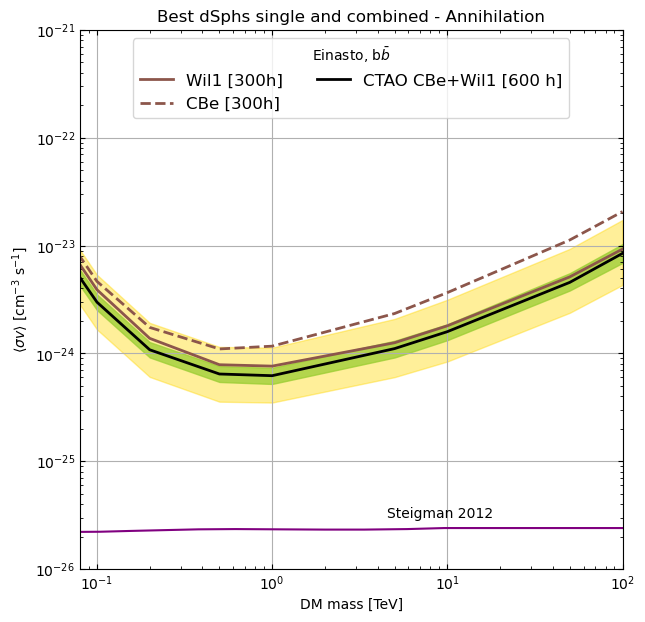

In [7]:
fig = plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ [cm$^{-3}$ s$^{-1}$]")
plt.xlim(8e-2,1e2)
plt.ylim(1e-26,1e-21)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title('Best dSphs single and combined - Annihilation')

plt.grid()
plt.tick_params(which='both', direction='in', top=True, right=True)


dSphNamesNorth = ['Wil1', 'CBe'] # don't care about the variable name
dSphLabelsNorth = [r'Wil1 [300h]', r'CBe [300h]']
colorNorth = ['tab:brown','tab:brown']
lstyle = ['solid','dashed']
profile='Einasto'
scaleTime = np.sqrt(100./300.)
    
contador = 0
for name, color,label,ls in zip(dSphNamesNorth,colorNorth,dSphLabelsNorth,lstyle):
    
   
    
   
    scale = 1 
    mask = (df['quantile'] == 0.5) & (df['name']==name) & (df['profile']==profile) & (df['ch']=='b')
    plt.loglog(df[mask]['mass'],df[mask]['sigma_v']*scaleTime * scale, 
               ls=ls, linewidth=2, color=color,
               #marker='o',
               label=label)


    contador = contador + 1
    
    
    
mask_dw = (df_stack_Wil1_and_CBe_T300['quantile'] == 0.05) & (df_stack_Wil1_and_CBe_T300['profile']==profile) & (df_stack_Wil1_and_CBe_T300['ch']=='b')
mask_up = (df_stack_Wil1_and_CBe_T300['quantile'] == 0.95) & (df_stack_Wil1_and_CBe_T300['profile']==profile) & (df_stack_Wil1_and_CBe_T300['ch']=='b')
plt.fill_between(df_stack_Wil1_and_CBe_T300[mask_dw]['mass'],
                 df_stack_Wil1_and_CBe_T300[mask_up]['sigma_v'],
                 df_stack_Wil1_and_CBe_T300[mask_dw]['sigma_v'], color='gold', alpha=0.4)


mask_dw = (df_stack_Wil1_and_CBe_T300['quantile'] == 0.32) & (df_stack_Wil1_and_CBe_T300['profile']==profile) & (df_stack_Wil1_and_CBe_T300['ch']=='b')
mask_up = (df_stack_Wil1_and_CBe_T300['quantile'] == 0.68) & (df_stack_Wil1_and_CBe_T300['profile']==profile) & (df_stack_Wil1_and_CBe_T300['ch']=='b')
plt.fill_between(df_stack_Wil1_and_CBe_T300[mask_dw]['mass'],
                 df_stack_Wil1_and_CBe_T300[mask_up]['sigma_v'],
                 df_stack_Wil1_and_CBe_T300[mask_dw]['sigma_v'], color='yellowgreen', alpha=0.75)



mask = (df_stack_Wil1_and_CBe_T300['quantile'] == 0.5) & (df_stack_Wil1_and_CBe_T300['profile']==profile) & (df_stack_Wil1_and_CBe_T300['ch']=='b')
plt.loglog(df_stack_Wil1_and_CBe_T300[mask]['mass'],df_stack_Wil1_and_CBe_T300[mask]['sigma_v'], 
           ls='-', linewidth=2, color='black',
           #marker='o',
           label=r'CTAO CBe+Wil1 [600 h]') 



plt.plot(relic.mass, relic.sigmav, color="purple")
plt.text(x=4.500, y=3e-26, s='Steigman 2012')

plt.legend(title=r'Einasto, b$\bar{b}$', fontsize=12, ncols=2, loc='upper center')

#plt.savefig('stack_Einasto_Wil1_CBe_bb_T300h_prod5.pdf', bbox_inches='tight', pad_inches=0.3)
#plt.savefig('stack_Einasto_Wil1_CBe_bb_T300h_prod5.png', bbox_inches='tight', pad_inches=0.3)
plt.savefig('plot_combined_Wil1_CBe_ann_einasto_bb.png', bbox_inches='tight', pad_inches=0.3)


## Singla and Combined Annihilation

DraI tab:gray
RetII tab:gray
Scl tab:gray
SgrII tab:orange
UMaII tab:orange
UMi tab:orange
CBe tab:brown
Wil1 tab:brown


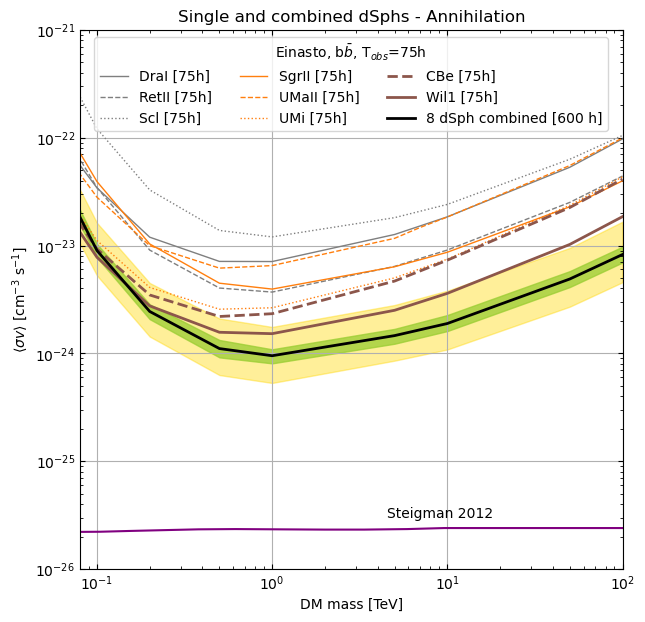

In [9]:
fig = plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ [cm$^{-3}$ s$^{-1}$]")
plt.xlim(8e-2,1e2)
plt.ylim(1e-26,1e-21)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title('Single and combined dSphs - Annihilation')

plt.grid()
plt.tick_params(which='both', direction='in', top=True, right=True)

profile='Einasto'

dSphNames = ['DraI','RetII', 'Scl', 'SgrII', 'UMaII', 'UMi','CBe','Wil1']
dSphLabels = ['DraI [75h]','RetII [75h]', 'Scl [75h]' , 'SgrII [75h]', 'UMaII [75h]', 'UMi [75h]','CBe [75h]','Wil1 [75h]'] 
dSphcolor = ['tab:gray','tab:gray','tab:gray','tab:orange','tab:orange','tab:orange','tab:brown','tab:brown']
linestyles = ["-","--",":","-","--",":","--","-"]
linesizes = [1,1,1,1,1,1,2,2]

contador = 0
for name, color,lsize,lstyle,label in zip(dSphNames,dSphcolor,linesizes,linestyles,dSphLabels):

    print(name, color)
    
    scale = 1
    scale_time = np.sqrt(100./75)
    
    mask = (df['quantile'] == 0.5) & (df['name']==name) & (df['profile']== profile) & (df['ch']=='b')
    plt.loglog(df[mask]['mass'],df[mask]['sigma_v'] * scale * scale_time, 
               ls=lstyle, linewidth=lsize, color=color,
               #marker='o',
               label=label)


    contador = contador + 1
    
    
    
mask_dw = (df_stack['quantile'] == 0.05) & (df_stack['profile']== profile) & (df_stack['ch']=='b')
mask_up = (df_stack['quantile'] == 0.95) & (df_stack['profile']==profile) & (df_stack['ch']=='b')
plt.fill_between(df_stack[mask_dw]['mass'],
                 df_stack[mask_up]['sigma_v'],
                 df_stack[mask_dw]['sigma_v'], color='gold', alpha=0.4)


mask_dw = (df_stack['quantile'] == 0.32) & (df_stack['profile']==profile) & (df_stack['ch']=='b')
mask_up = (df_stack['quantile'] == 0.68) & (df_stack['profile']==profile) & (df_stack['ch']=='b')
plt.fill_between(df_stack[mask_dw]['mass'],
                 df_stack[mask_up]['sigma_v'],
                 df_stack[mask_dw]['sigma_v'], color='yellowgreen', alpha=0.75)



mask = (df_stack['quantile'] == 0.5) & (df_stack['profile']==profile) & (df_stack['ch']=='b')
plt.loglog(df_stack[mask]['mass'],df_stack[mask]['sigma_v'], 
           ls='-', linewidth=2, color='black',
           #marker='o',
           label=r'8 dSph combined [600 h]') 


plt.plot(relic.mass, relic.sigmav,color="purple")
plt.text(x=4.5, y=3e-26, s='Steigman 2012')

plt.legend(title=r'Einasto, b$\bar{b}$, T$_{obs}$=75h',ncol=3, fontsize=10, loc='upper center')

#plt.savefig('stackAllSource_bb_Einasto_T75h_prod5.pdf', bbox_inches='tight', pad_inches=0.3)
#plt.savefig('stackAllSource_bb_Einasto_T75h_prod5.png', bbox_inches='tight', pad_inches=0.3)
plt.savefig('plot_single_combined_ann_einasto_bb.png', bbox_inches='tight', pad_inches=0.3)